In [10]:
from train import train
from visualize import plot_model, plot_models, plot_stats, plot_hist
from distributions import *
from divergences import forward_kl, reverse_kl, js_divergence
from mixture_models import MixtureModel, GumbelMixtureModel

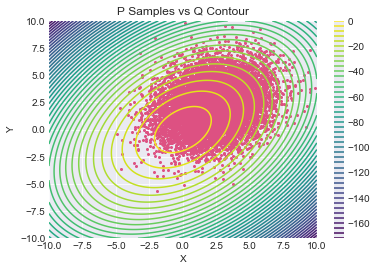

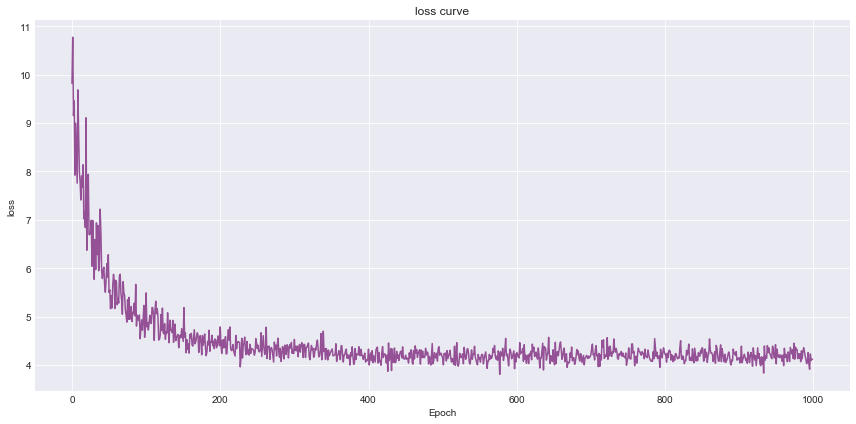

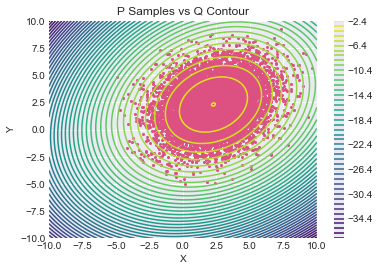

In [13]:
q_model = Normal([0.0, 0.0],[1.0, 0.4, 0.4, 1.0])
p_model = Normal([2.3, 2.3], [4.0, 1.0, 1.0, 4.0])

plot_models(p_model, q_model)
stats = train(p_model, q_model, forward_kl, track_parameters=False)
plot_stats(stats)
plot_models(p_model, q_model)

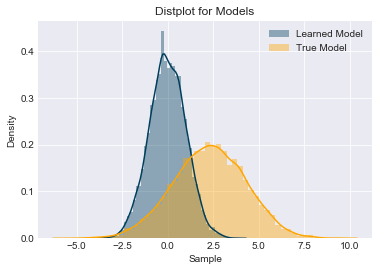

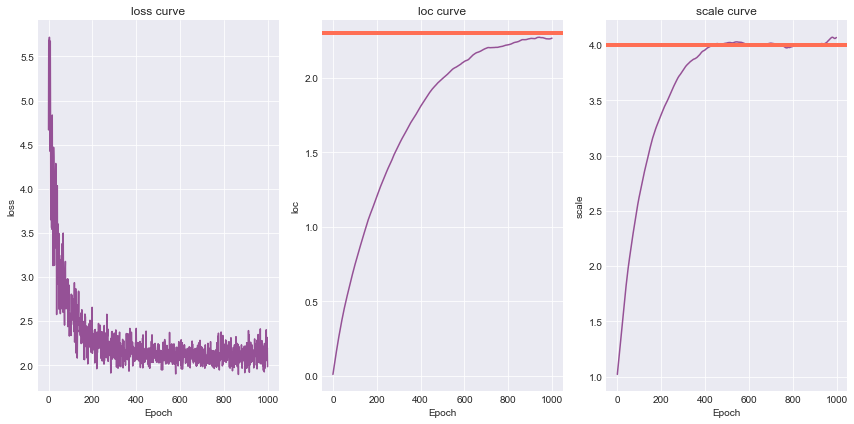

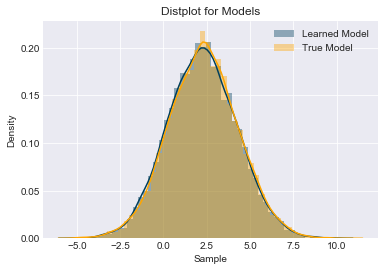

In [8]:
q_model = Normal([0.0],[[1.0]])
p_model = Normal([2.3], [[4.0]])

plot_models(p_model, q_model)
stats = train(p_model, q_model, ForwardKL)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])
plot_models(p_model, q_model)

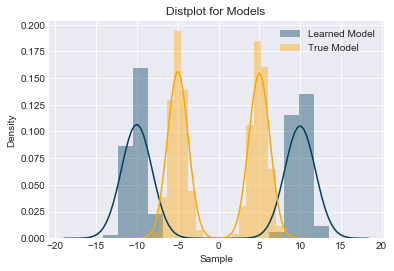

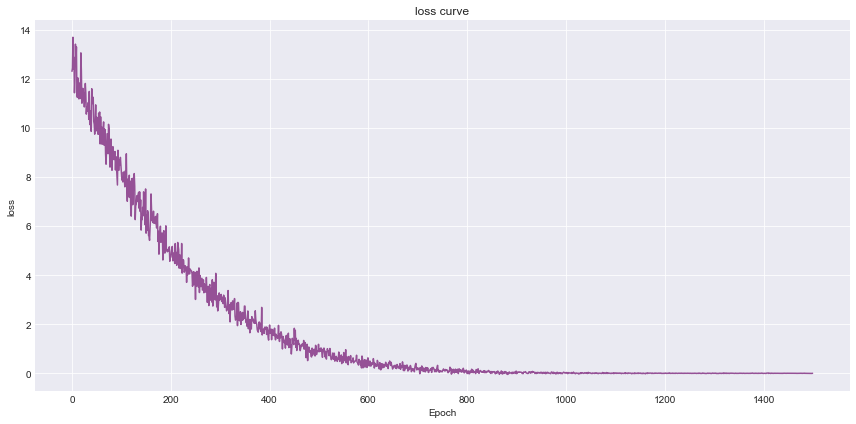

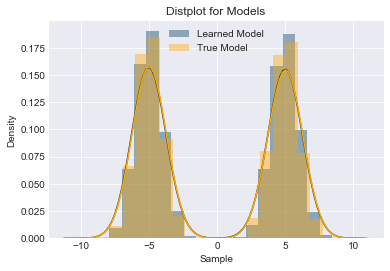

In [9]:
p_model = MixtureModel([Normal([-5.0], [[1.0]]), 
                        Normal([5.0], [[1.0]])], 
                       [0.5, 0.5])
q_model = MixtureModel([Normal([-10.0], [[1.0]]), 
                        Normal([10.0], [[1.0]])], 
                       [0.5, 0.5])

plot_models(p_model, q_model)
stats = train(p_model, q_model, ReverseKL, epochs=1500)
plot_stats(stats)
plot_models(p_model, q_model)

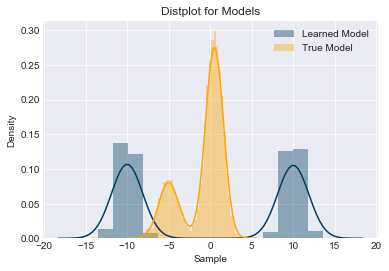

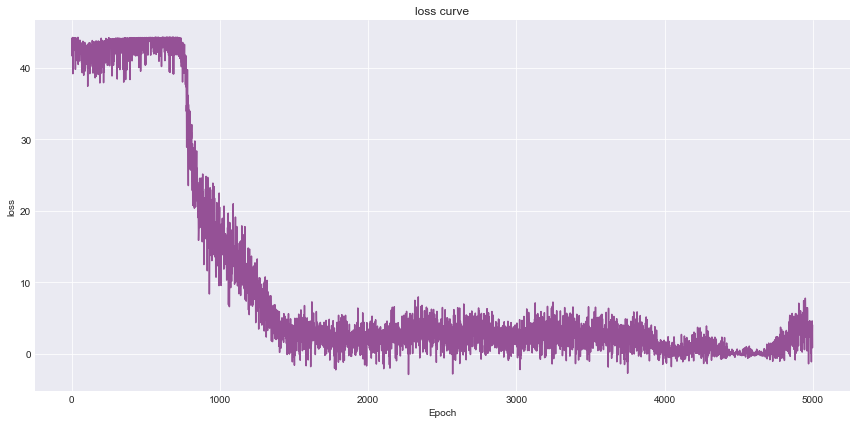

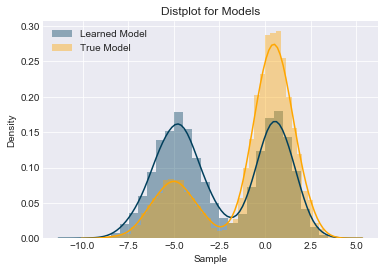

In [4]:
p_model = GumbelMixtureModel([Normal([-5.0], [[1.4]]), 
                        Normal([0.5], [[1.0]])], 
                       [0.25, 0.75])
q_model = GumbelMixtureModel([Normal([-10.0], [[1.0]]), 
                              Normal([10.0], [[1.0]])], 
                              [0.5, 0.5])

plot_models(p_model, q_model)
stats = train(p_model, q_model, JSDivergence, epochs=5000)
plot_stats(stats)
plot_models(p_model, q_model)

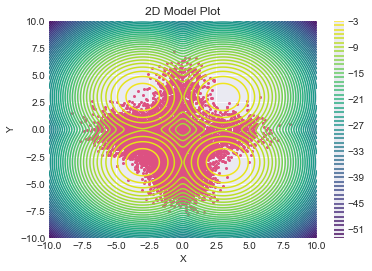

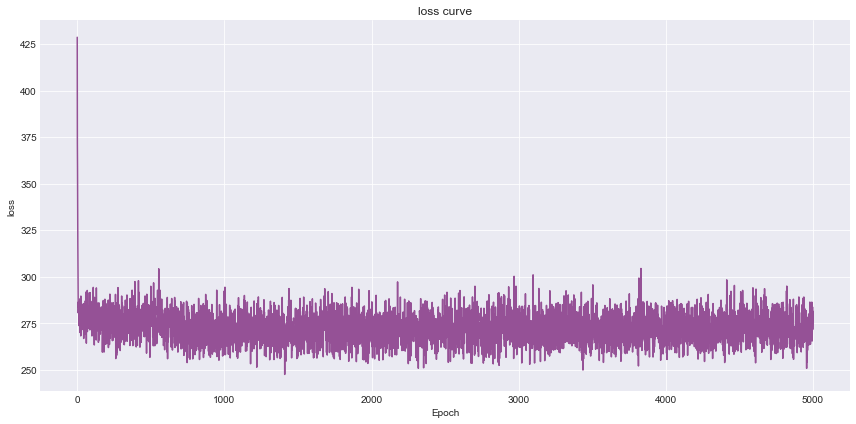

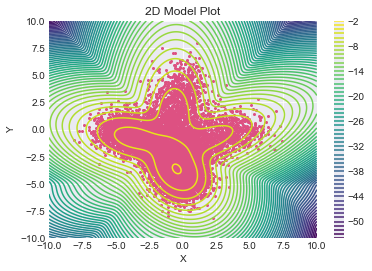

tensor([0.2838, 0.4168, 0.1785, 0.1209], grad_fn=<SoftmaxBackward>)

In [5]:
q_model = GumbelMixtureModel([Normal([-3.0, -3.0], [[1.0, 0], [0, 1]]), 
                         Normal([3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([3.0, -3.0], [[1.0, 0], [0, 1.0]])], 
                         [0.25, 0.25, 0.25, 0.25], hard=False)

p_model = GumbelMixtureModel([Normal([0.0, 5.0], [[1.0, 0], [0, 1.0]]),
                         Normal([0.0, -5.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-5.0, 0.0], [[1.0, 0], [0, 1.0]]),
                         Normal([5.0, 0.0], [[1.0, 0], [0, 1.0]])], 
                         [0.1, 0.5, 0.3, 0.1], hard=False, temperature=0.7)

plot_models(p_model, q_model)
stats = train(p_model, q_model, ForwardKL, lr=0.1, 
              epochs=5000, track_parameters=False)
plot_stats(stats)
plot_models(p_model, q_model)
q_model.categorical.probs

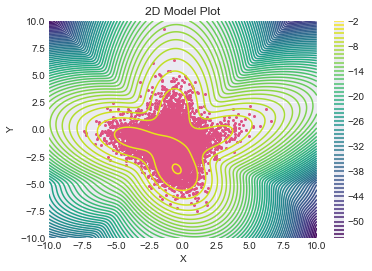

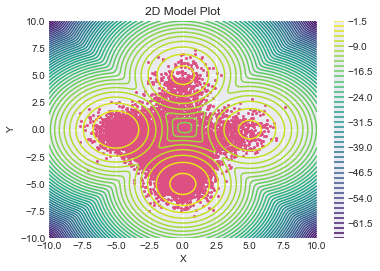

In [6]:
plot_model(q_model)
plot_model(p_model)

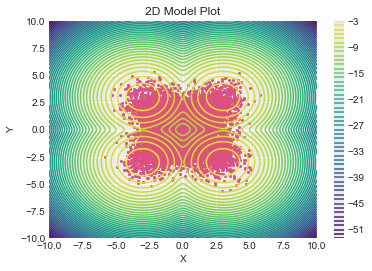

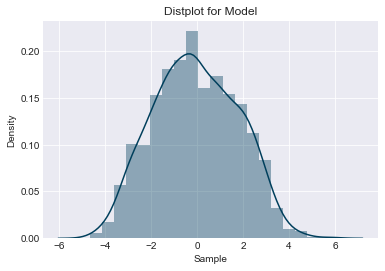

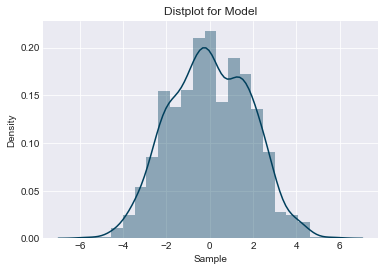

In [7]:
q_model = GumbelMixtureModel([Normal([-3.0, -3.0], [[1.0, 0], [0, 1]]), 
                         Normal([3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([-3.0, 3.0], [[1.0, 0], [0, 1.0]]),
                         Normal([3.0, -3.0], [[1.0, 0], [0, 1.0]])], 
                         [0.25, 0.25, 0.25, 0.25], hard=False, temperature=1.0)

plot_model(q_model)
samples = q_model.sample(1000).detach().numpy()
plot_hist(samples[:,0])
plot_hist(samples[:, 1])

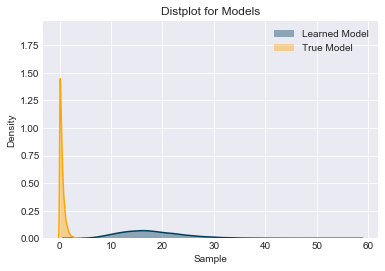

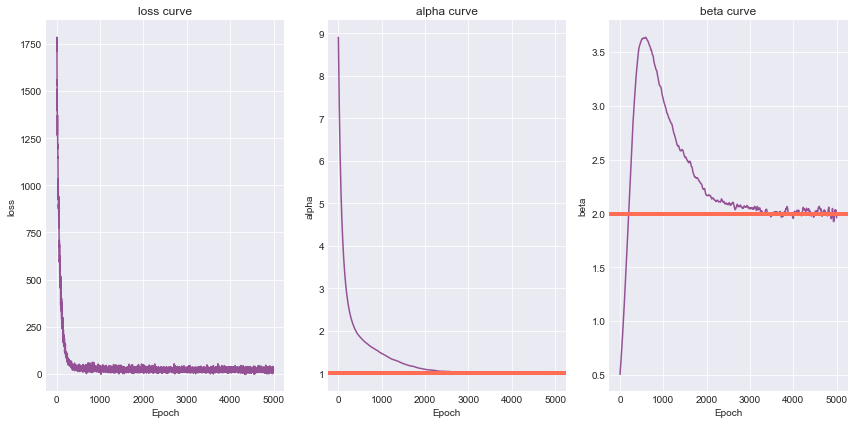

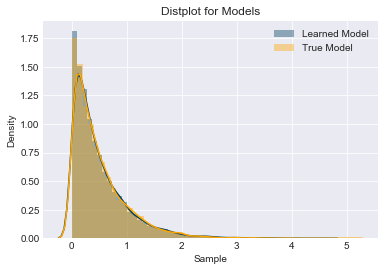

In [3]:
q_model = Gamma([9.0],[0.5])
p_model = Gamma([1.0], [2.0])

plot_models(p_model, q_model)
stats = train(p_model, q_model, ForwardKL, epochs=5000)
plot_stats(stats, goals=[p_model.alpha.item(), p_model.beta.item()])
plot_models(p_model, q_model)

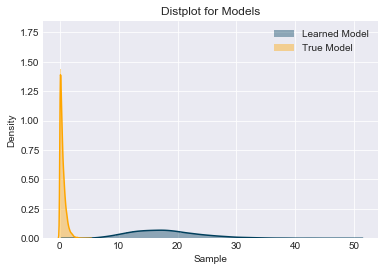

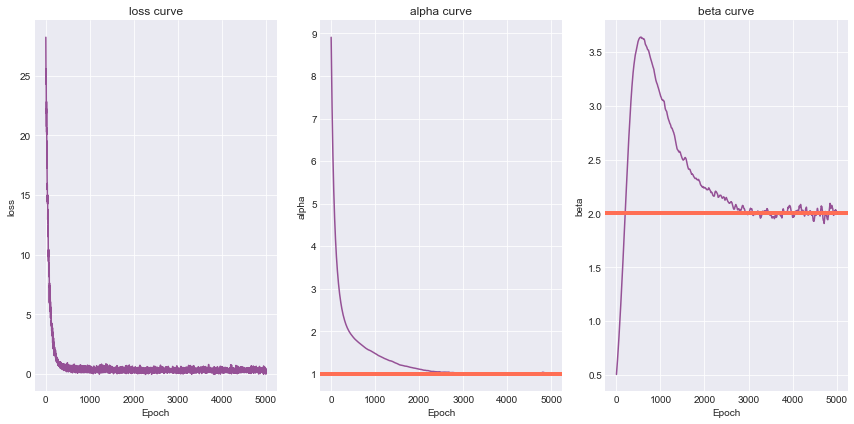

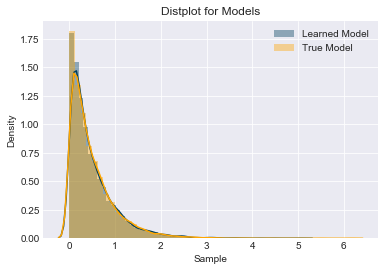

In [6]:
q_model = Gamma([9.0],[0.5])
p_model = Gamma([1.0], [2.0])

plot_models(p_model, q_model)
stats = train(p_model, q_model, ForwardKL, epochs=5000)
plot_stats(stats, goals=[p_model.alpha.item(), p_model.beta.item()])
plot_models(p_model, q_model)